1.Entrena un modelo de redes neuronales para clasificar los dígitos del 0 al 9, y muestra mediante gráficas el comportamiento del sistema a lo largo del entrenamiento. Especifica la exactitud del modelo tanto en entrenamiento como en validación.
2. 2. Evalúa la exactitud del modelo en el conjunto de prueba generado al cargar la base de datos y compárala con la exactitud de validación del modelo. Realiza un comentario sobre los resultados de dicha comparación

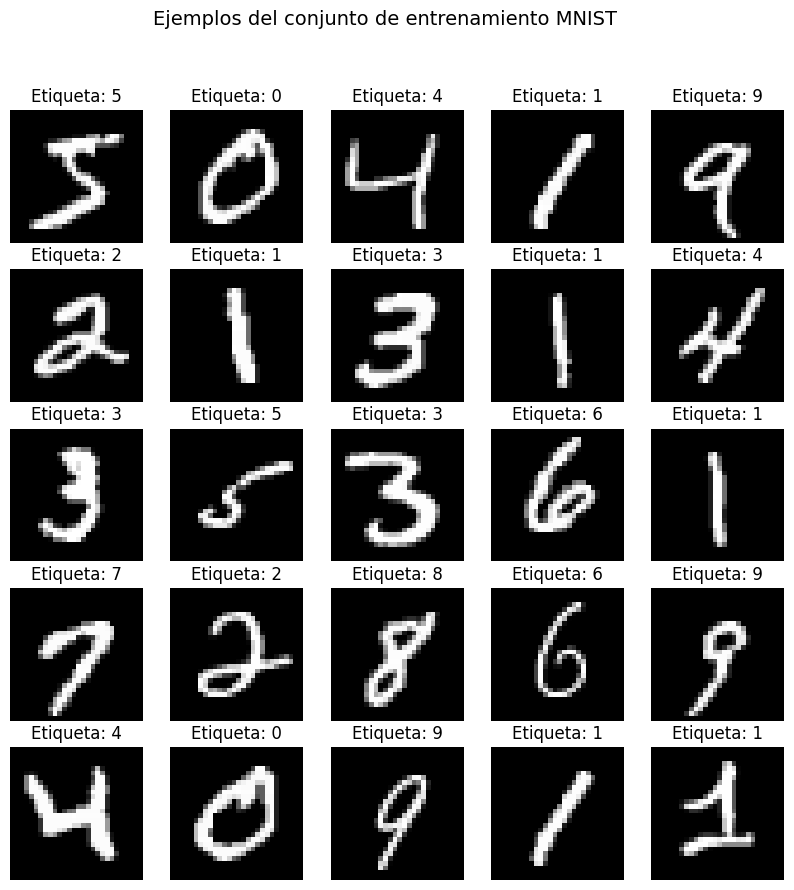

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7776 - loss: 0.7429 - val_accuracy: 0.9481 - val_loss: 0.1815
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9415 - loss: 0.1973 - val_accuracy: 0.9631 - val_loss: 0.1311
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9573 - loss: 0.1415 - val_accuracy: 0.9669 - val_loss: 0.1097
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9655 - loss: 0.1131 - val_accuracy: 0.9722 - val_loss: 0.0955
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9714 - loss: 0.0916 - val_accuracy: 0.9722 - val_loss: 0.0920
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9763 - loss: 0.0785 - val_accuracy: 0.9733 - val_loss: 0.0907
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9781 - loss: 0.0708 - val_accuracy: 0.9742 - val_loss: 0.0855
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9801 - loss: 0.0634 - val_accuracy: 0.

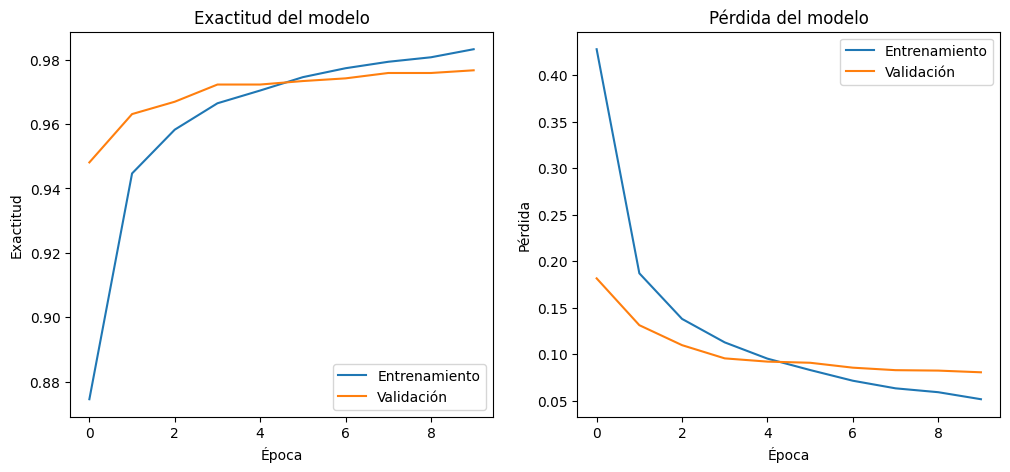

Modelo guardado como 'mnist_model.h5'


In [1]:
# Importar librerías necesarias
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 1. Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Normalizar los datos (valores de píxeles de 0-255 a 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')

plt.suptitle("Ejemplos del conjunto de entrenamiento MNIST", fontsize=14)
plt.show()
# 3. Aplanar las imágenes (de 28x28 a 784)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# 4. Definir el modelo de red neuronal
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 5. Compilar el modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 6. Entrenar el modelo
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=128,
    verbose=1
)

# 7. Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Exactitud en entrenamiento: {history.history['accuracy'][-1]:.4f}")
print(f"Exactitud en validación: {history.history['val_accuracy'][-1]:.4f}")
print(f"Exactitud en prueba: {test_accuracy:.4f}")

# 8. Graficar pérdida y exactitud
plt.figure(figsize=(12,5))

# Exactitud
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Exactitud del modelo')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.legend()

# Pérdida
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

# 9. Guardar el modelo
model.save('mnist_model.h5')
print("Modelo guardado como 'mnist_model.h5'")

La exactitud del modelo en entrenamiento es de 0.9832 y la de validación es de 0.9767. Ambos resultados son altos y vamos que no hay una diferencia grande entre ellos, por lo que podemos concluir un buen desempeño en validación. Después, en el conjunto de prueba, vemos que su exactitud es de 0.9765, igual un número extremadamente cercano al de vlaidación, por lo que podemos obtener las mismas conclusiones.

3. 3. Genera 50 imágenes, 5 para cada dígito. Preprocesa las imágenes para que puedan ser evaluadas por el modelo. Transformamos las imágenes de 28x28 y luego almacenamos la información de los pixeles en un vector para poder así procesar ese vector.

Modelo cargado exitosamente.
🔍 Imágenes encontradas: ['0.2.jpg', '0.1.jpg', '0.3.jpg', '9.3.jpg', '9.5.jpg', '8.4.jpg', '9.1.jpg', '9.4.jpg', '5.3.jpg', '4.3.jpg', '6.1.jpg', '8.3.jpg', '7.3.jpg', '5.4.jpg', '6.2.jpg', '7.5.jpg', '4.4.jpg', '8.2.jpg', '7.4.jpg', '5.2.jpg', '7.2.jpg', '8.1.jpg', '5.1.jpg', '4.1.jpg', '3.4.jpg', '6.3.jpg', '9.2.jpg', '5.5.jpg', '7.1.jpg', '8.5.jpg', '4.5.jpg', '3.2.jpg', '3.3.jpg', '6.4.jpg', '3.5.jpg', '4.2.jpg', '0.5.jpg', '0.4.jpg', '2.4.jpg', '2.5.jpg', '2.3.jpg', '2.2.jpg', '1.3.jpg', '1.4.jpg', '2.1.jpg', '3.1.jpg', '1.1.jpg', '1.2.jpg', '1.5.jpg', '6.5.jpg']
✅ Total imágenes cargadas: 50
Etiquetas: [0 0 0 9 9 8 9 9 5 4 6 8 7 5 6 7 4 8 7 5 7 8 5 4 3 6 9 5 7 8 4 3 3 6 3 4 0
 0 2 2 2 2 1 1 2 3 1 1 1 6]
Exactitud del modelo en tus imágenes: 0.1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


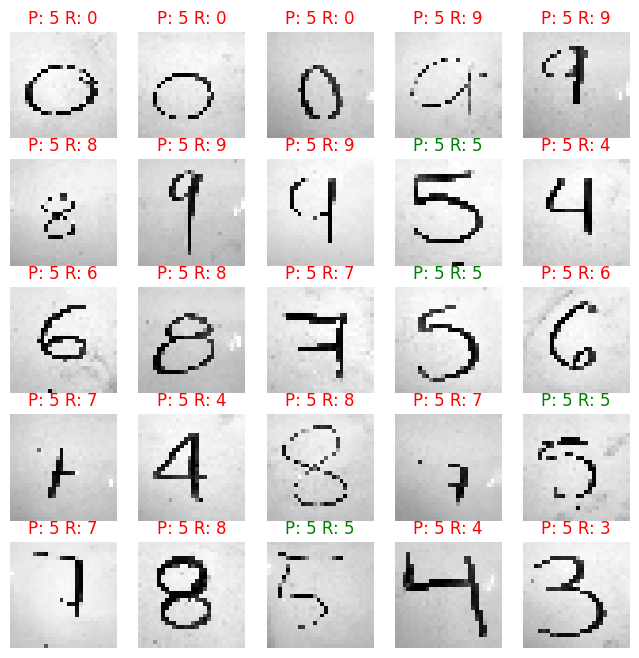

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model

# Cargar el modelo entrenado
try:
    model = load_model('mnist_model.h5')
    print("Modelo cargado exitosamente.")
except Exception as e:
    print(f"Error al cargar el modelo: {e}")
    print("Asegúrate de que el modelo 'mnist_model.h5' ha sido guardado.")
    # Si el modelo no se carga, salimos del script o manejamos el error
    exit()


ruta = '/content/drive/MyDrive/digitos/'
archivos = [f for f in os.listdir(ruta) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
print("🔍 Imágenes encontradas:", archivos)

if not archivos:
    print("No se encontraron imágenes para procesar.")
else:
    imagenes = []
    etiquetas = []

    for archivo in archivos:
        img = cv2.imread(os.path.join(ruta, archivo), cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"⚠️ No se pudo leer {archivo}")
            continue
        img = cv2.resize(img, (28, 28))
        img = img / 255.0
        etiqueta = int(archivo.split('.')[0])
        imagenes.append(img.flatten())
        etiquetas.append(etiqueta)

    imagenes = np.array(imagenes)
    etiquetas = np.array(etiquetas)

    print(f"otal imágenes cargadas: {len(imagenes)}")
    print(f"Etiquetas: {etiquetas}")

    # Evaluar el modelo con las imágenes cargadas
    loss, accuracy = model.evaluate(imagenes, etiquetas, verbose=0)
    print(f"Exactitud del modelo en tus imágenes: {accuracy:.4f}")

    # Realizar predicciones
    predicciones = model.predict(imagenes)
    etiquetas_predichas = np.argmax(predicciones, axis=1)


    plt.figure(figsize=(8,8))
    for i in range(min(25, len(imagenes))):
        plt.subplot(5,5,i+1)
        plt.imshow(imagenes[i].reshape(28,28), cmap='gray')
        color = 'green' if etiquetas_predichas[i] == etiquetas[i] else 'red'
        plt.title(f"P: {etiquetas_predichas[i]} R: {etiquetas[i]}", color=color)
        plt.axis('off')
    plt.show()

Podemos notar que la exactitud es extremadamente baja, en especial comparada a los resultados anteriores. De hecho, logra esa exactitud porque a tood predice 5 y como hay 4 cincos, por eso le atina. Esto es porque la imagen con la que estamos probando el modelo es muy diferente a las imágenes con las que se entrenó.

5. Genera 3 mejoras, innovaciones, o adiciones al sistema actual .
Lo primero que hice fue normalizar la iluminación (recomendado por ChatGPT), ya que las fotos fueron tomadas en un pizarrón que relfejaba un poco así que había que ajustarlo. Lo segundo fue invertir los colores, mis imagénes eran fondo blanco con números negros y el entrenamiento era al revés. Si no fuera así, también se podría simplemente convertir todo a una escala de grises.
Finalmente normalicé los valores (también recomendado), para que en vez de los valores de color quedar de 0-255 quedaran de 0-1 para evitar números grandes.


Exactitud del modelo tras aplicar mejoras: 0.1400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


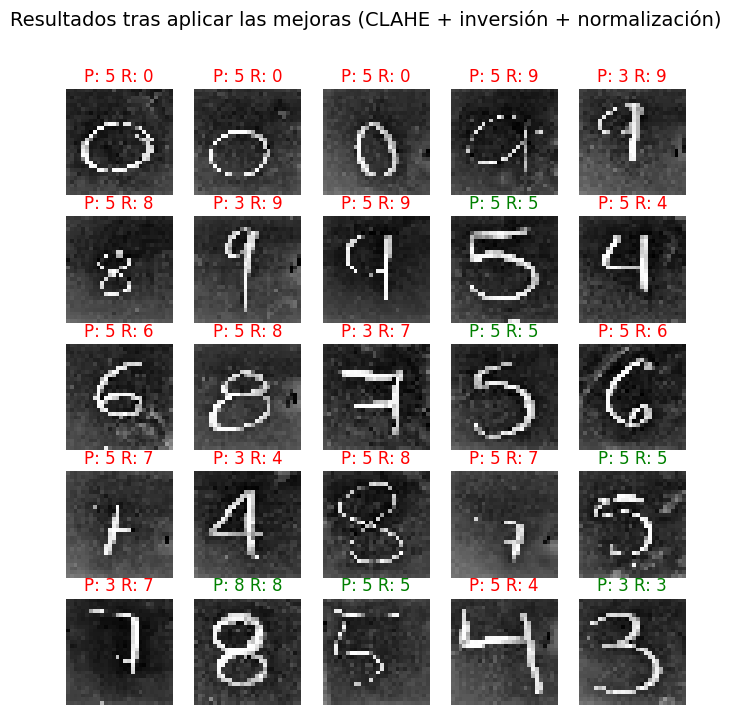

In [5]:
# ============================================================
# MEJORAS APLICADAS AL SISTEMA DE CLASIFICACIÓN
# ============================================================
imagenes_mejoradas = []
etiquetas_mejoradas = []

for archivo in archivos:
    img = cv2.imread(os.path.join(ruta, archivo), cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f" No se pudo leer {archivo}")
        continue

    # MEJORA 1: Normalización de iluminación (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img = clahe.apply(img)

    # Redimensionar a 28x28
    img = cv2.resize(img, (28, 28))

    # MEJORA 2: Inversión de color (fondo blanco → negro)
    img = 255 - img

    # MEJORA 3: Normalizar a valores [0,1]
    img = img / 255.0
    imagenes_mejoradas.append(img.flatten())

    etiqueta = int(archivo.split('.')[0])
    etiquetas_mejoradas.append(etiqueta)

imagenes_mejoradas = np.array(imagenes_mejoradas)
etiquetas_mejoradas = np.array(etiquetas_mejoradas)

# ============================================================
# Evaluar nuevamente con las mejoras
# ============================================================
loss, accuracy = model.evaluate(imagenes_mejoradas, etiquetas_mejoradas, verbose=0)
print(f"\nExactitud del modelo tras aplicar mejoras: {accuracy:.4f}")

# Predicciones
pred_mejoradas = model.predict(imagenes_mejoradas)
etiquetas_pred_mejoradas = np.argmax(pred_mejoradas, axis=1)

# ============================================================
# Visualizar resultados con mejoras
# ============================================================
plt.figure(figsize=(8,8))
for i in range(min(25, len(imagenes_mejoradas))):
    plt.subplot(5,5,i+1)
    plt.imshow(imagenes_mejoradas[i].reshape(28,28), cmap='gray')
    color = 'green' if etiquetas_pred_mejoradas[i] == etiquetas_mejoradas[i] else 'red'
    plt.title(f"P: {etiquetas_pred_mejoradas[i]} R: {etiquetas_mejoradas[i]}", color=color)
    plt.axis('off')

plt.suptitle("Resultados tras aplicar las mejoras (CLAHE + inversión + normalización)", fontsize=14)
plt.show()


Como podemos ver, la exactitud si aumentó, aunque no demasiado, estos cambios si hicieron que el modelo empezara a predecir correctamente números aparte del cinco.

In [4]:
from google.colab import files
files.download('mnist_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>